In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# import standard scaler
from sklearn.preprocessing import StandardScaler

train_features = np.load('mnist_train_features.npy')
train_targets = np.load('mnist_train_targets.npy')

test_features = np.load('mnist_test_features.npy')
test_targets = np.load('mnist_test_targets.npy')

# flatten the images
train_features_flat = train_features.reshape((-1, 28*28))
test_features_flat = test_features.reshape((-1, 28*28))

# standardize the data
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features_flat).reshape((-1, 28, 28))
test_features = scaler.transform(test_features_flat).reshape((-1, 28, 28))

validation_features = train_features[:100]
validation_targets = train_targets[:100]

train_features = train_features[100:]
train_targets = train_targets[100:]

#reshape: number of samples, channels, height, width
train_features = train_features.reshape((-1, 1,28,28))
validation_features = validation_features.reshape((-1, 1,28,28))
test_features = test_features.reshape((-1, 1,28,28))


In [15]:
class CNNModel(torch.nn.Module):

    def __init__(self):
        super(CNNModel, self).__init__()

        self.cnn1 = torch.nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2)

        self.maxpool1 = torch.nn.MaxPool2d(kernel_size=2)

        self.cnn2 = torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2)

        self.maxpool2 = torch.nn.MaxPool2d(kernel_size=2)

        self.fc1 = torch.nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        out = self.cnn1(x) # Convolution 1
        out = torch.nn.functional.relu(out) # Activation function
        out = self.maxpool1(out) # Pooling 1
        out = self.cnn2(out) # Convolution 2
        out = torch.nn.functional.relu(out) # Activation function
        out = self.maxpool2(out) # Pooling 2
        out = out.view(out.size(0), -1) # Flatten the data to 1D
        out = self.fc1(out) # Fully connected layer
        return out

In [16]:
torch.manual_seed(25)
model = CNNModel()

lr = 0.003
epochs = 15
batch_size = 100

loss_fn = torch.nn.CrossEntropyLoss() # automatically applies softmax to output
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [17]:
train_loss_list = []
validation_accuracy_list = np.zeros((epochs,))

In [18]:
import tqdm

train_inputs = torch.from_numpy(train_features).float()
train_targets = torch.from_numpy(train_targets).long()

validation_inputs = torch.from_numpy(validation_features).float()
validation_targets = torch.from_numpy(validation_targets).long()

test_inputs = torch.from_numpy(test_features).float()
test_targets = torch.from_numpy(test_targets).long()

train_batches_features = torch.split(train_inputs, batch_size)
train_batches_targets = torch.split(train_targets, batch_size)

batch_split_num = len(train_batches_features)

In [20]:
for epoch in tqdm.trange(epochs):

    for k in range(batch_split_num):

        optimizer.zero_grad()

        train_batch_outputs = model(train_batches_features[k])

        loss = loss_fn(train_batch_outputs, train_batches_targets[k])

        train_loss_list.append(loss.item())

        loss.backward()

        optimizer.step()

        #compute validation accuracy

        with torch.no_grad():

            validation_outputs = model(validation_inputs)

            correct = (torch.argmax(validation_outputs, dim=1) == validation_targets).type(torch.FloatTensor)

            validation_accuracy_list[epoch] = correct.mean()

100%|██████████| 15/15 [00:04<00:00,  3.11it/s]


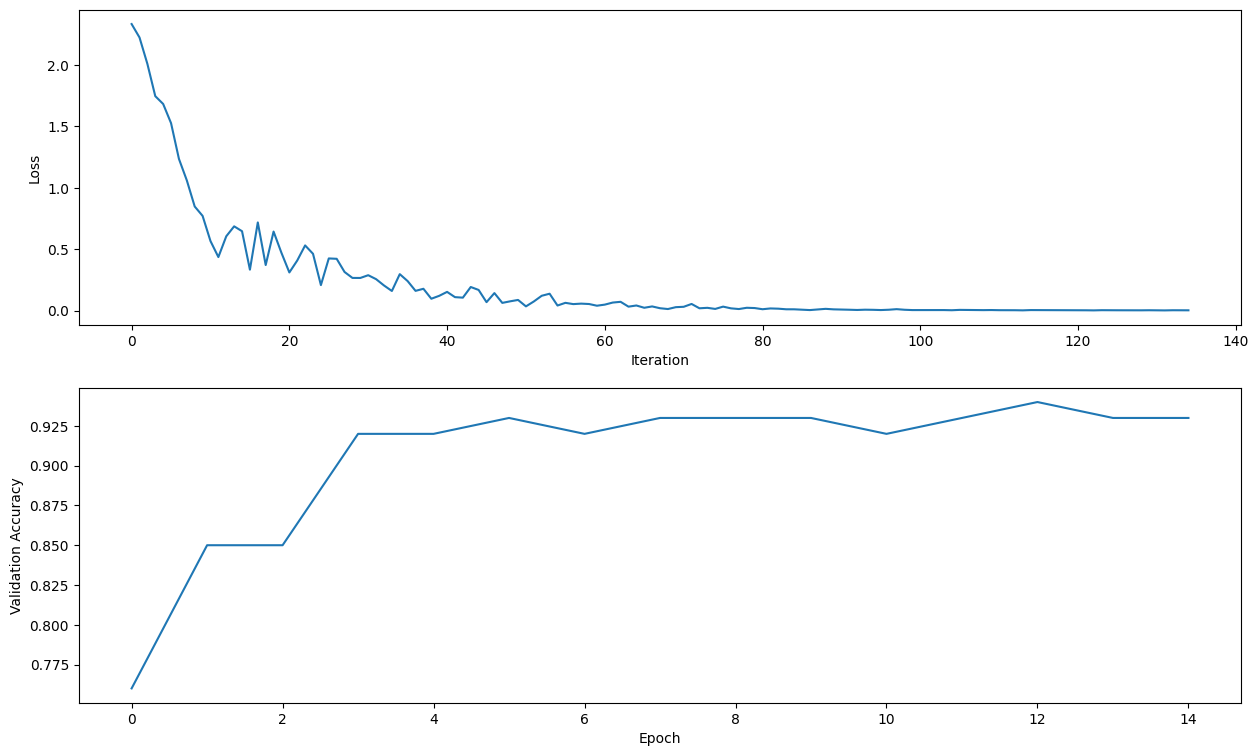

In [21]:
# pring loss and accuracy
plt.figure(figsize=(15,9))

plt.subplot(2,1,1)
plt.plot(train_loss_list)
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2,1,2)
plt.plot(validation_accuracy_list)
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')

plt.show()

In [ ]:
# quiz question:
# create a new model with specified parameters

class myCNNModel(torch.nn.Module):

    def __init__(self):
        super(myCNNModel, self).__init__()

        self.cnn1 = torch.nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=0)

        self.maxpool1 = torch.nn.MaxPool2d(kernel_size=2)

        self.cnn2 = torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=0)

        self.maxpool2 = torch.nn.MaxPool2d(kernel_size=2)

        #fully connected layer with 800 neurons
        self.fc1 = torch.nn.Linear(32 * 5 * 5, 800)

    def forward(self, x):
        out = self.cnn1(x)
        out = torch.nn.functional.relu(out)
        out = self.maxpool1(out)
        out = self.cnn2(out)
        out = torch.nn.functional.relu(out)
        out = self.maxpool2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        return out